In [1]:
import filters 
import librosa
import librosa.display

import numpy as np 
import matplotlib.pyplot as plt

from numpy.typing import NDArray
from pathlib import Path
sample_rate = 384000
maxf= 100000
minf = 18000


In [2]:
!ls

__init__.py	_conversions.py     fourier.py	preprocess.py  wavelets.py
__pycache__	filter_build.ipynb  inputs.py	version.py
_annotation.py	filters.py	    outputs.py	viz.py


In [3]:
def viz_plot(buffer:NDArray, sample_rate:int = 384000) -> None:
    Dxx = librosa.stft(buffer)
    tf = librosa.power_to_db(np.abs(Dxx), ref =np.max )

    fig = plt.figure()
    ax = fig.gca()
    img = librosa.display.specshow(data=tf, sr=sample_rate, x_axis='time', y_axis='hz', ax = ax)    
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    ax.ylim
    return None

def drop_back_test(buffer:NDArray, sample_rate:int = 384000):
    Dxx = librosa.stft(buffer)
    tf = librosa.power_to_db(np.abs(Dxx), ref = np.max)

    col_avg = np.mean(tf, axis = 1)
    col_max = np.max(col_avg)
    
    
    minima = -80
    
    
    fig = plt.figure()
    ax = fig.gca()
    
    tf2 = np.where(tf >= col_max, tf, minima)

    img =librosa.display.specshow(data = tf2, sr =sample_rate, ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    return tf

In [4]:
path = Path("/work/skylerthomas_umass_edu/play_data")
fname = "LE-22-78-test-data.flac"
audio_path = path / fname 

In [5]:
buffer, sr = librosa.load(audio_path, sr = sample_rate)
#viz_plot(buffer)

In [10]:
sos_buffer = filters.bandpassSOS(buffer, order = 5, minCritfreq= 18000)
#viz_plot(sos_buffer)

In [11]:
Dxx = librosa.stft(sos_buffer)
tf = librosa.power_to_db(np.abs(Dxx), ref =np.max )
dropback_sos_buffer = filters.drop_back(tf)

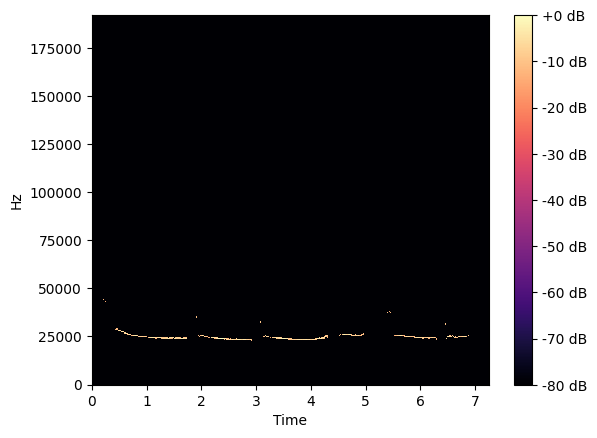

In [12]:
fig = plt.figure()
ax = fig.gca()
img = librosa.display.specshow(data=dropback_sos_buffer, sr=sample_rate, x_axis='time', y_axis='hz', ax = ax)    
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
x =drop_back_test(buffer)

In [ ]:
np.max(x, axis=0)

In [ ]:
np.max(x,axis=1)

In [ ]:
x.shape


In [ ]:
x,y = np.ogrid[:3,:4]